In [1]:
from keras.preprocessing import image
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout, Conv2D, Flatten, Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras import optimizers
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import tensorflow as tf
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

from keras import models
from keras import layers
from keras import optimizers

image_size = 224

In [3]:
def generator(dir, gen=ImageDataGenerator(rescale=1./255), shuffle=True, batch_size=128, target_size=(image_size, image_size), class_mode='categorical'):

    return gen.flow_from_directory(dir, batch_size=batch_size, shuffle=shuffle, color_mode='rgb', class_mode=class_mode, target_size=target_size)


BS = 128
TS = (image_size, image_size)
train_batch = generator('../input/new-data-224/new_224_data/train',shuffle=True, batch_size=BS, target_size=TS)
valid_batch = generator('../input/new-data-224/new_224_data/val',shuffle=True, batch_size=BS, target_size=TS) 

Found 49134 images belonging to 4 classes.
Found 6141 images belonging to 4 classes.


In [4]:
#Load the VGG model
vgg_conv = VGG16(weights='imagenet') 


# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer.name, layer.trainable)

2022-11-14 18:37:46.002834: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 18:37:46.130029: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 18:37:46.131145: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 18:37:46.133319: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

553476096/553467096 [==============================] - 17s 0us/step
input_1 True
block1_conv1 True
block1_conv2 True
block1_pool True
block2_conv1 True
block2_conv2 True
block2_pool True
block3_conv1 True
block3_conv2 True
block3_conv3 True
block3_pool True
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True
flatten True
fc1 True
fc2 True
predictions True


In [107]:
model = models.Sequential()
for layer in vgg_conv.layers[:-1]:
    model.add(layer)

In [108]:
for layer in model.layers[:]:
    layer.trainable=False
for layer in model.layers[0:10]:
    layer.trainable=True

In [109]:
#model.add(layers.Dropout(0.2))
#model.add(layers.Dense(512, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [110]:
for layer in model.layers:
    print(layer.name, layer.trainable)

block1_conv1 True
block1_conv2 True
block1_pool True
block2_conv1 True
block2_conv2 True
block2_pool True
block3_conv1 True
block3_conv2 True
block3_conv3 True
block3_pool True
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False
flatten False
fc1 False
fc2 False
dense_21 True


In [111]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(train_batch,
              batch_size=128,
              epochs=40,
              validation_data=valid_batch,
              callbacks=[callback])
model.save('./vgg16Model.h5', overwrite=True)
np.save('./vgg16Hestory.npy',history.history)

Epoch 1/40
384/384 [==============================] - 299s 776ms/step - loss: 0.2388 - acc: 0.9219 - val_loss: 0.1408 - val_acc: 0.9508
Epoch 2/40
384/384 [==============================] - 297s 774ms/step - loss: 0.0989 - acc: 0.9674 - val_loss: 0.0706 - val_acc: 0.9766
Epoch 3/40
384/384 [==============================] - 298s 774ms/step - loss: 0.0713 - acc: 0.9764 - val_loss: 0.0538 - val_acc: 0.9814
Epoch 4/40
384/384 [==============================] - 297s 774ms/step - loss: 0.0580 - acc: 0.9809 - val_loss: 0.0439 - val_acc: 0.9850
Epoch 5/40
384/384 [==============================] - 298s 774ms/step - loss: 0.0458 - acc: 0.9854 - val_loss: 0.0338 - val_acc: 0.9901
Epoch 6/40
384/384 [==============================] - 298s 775ms/step - loss: 0.0381 - acc: 0.9876 - val_loss: 0.0281 - val_acc: 0.9907
Epoch 7/40
384/384 [==============================] - 299s 777ms/step - loss: 0.0328 - acc: 0.9904 - val_loss: 0.0231 - val_acc: 0.9928
Epoch 8/40
384/384 [============================

In [112]:
train = model.evaluate(train_batch, verbose=0)
test= model.evaluate(valid_batch, verbose=0)
print(train,test)

[0.0009261459927074611, 0.999735414981842] [0.0032299484591931105, 0.9990229606628418]


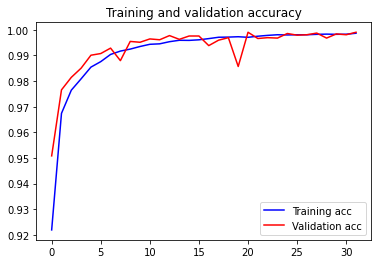

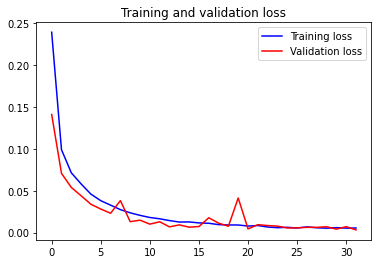

In [114]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('./Train and validation accuracy.png')
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('./Train and validation loss.png')
plt.show()

In [115]:


test_generator = ImageDataGenerator(rescale=1./255)

test_data_generator = test_generator.flow_from_directory('../input/new-data-224/new_224_data/test',
                                                         target_size=TS,
                                                         batch_size=32,
                                                         shuffle=False,
                                                         color_mode='rgb')

test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)
predictions = model.predict(test_data_generator, steps=test_steps_per_epoch)

Found 6145 images belonging to 4 classes.


In [116]:
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys()) 

In [117]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)   

              precision    recall  f1-score   support

      closed       1.00      1.00      1.00      1523
     no_yawn       1.00      1.00      1.00      1529
        open       1.00      1.00      1.00      1524
        yawn       1.00      1.00      1.00      1569

    accuracy                           1.00      6145
   macro avg       1.00      1.00      1.00      6145
weighted avg       1.00      1.00      1.00      6145



In [118]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
confusion_matrix = confusion_matrix(true_classes, predicted_classes)
print(confusion_matrix)

[[1521    1    0    1]
 [   0 1526    0    3]
 [   0    0 1524    0]
 [   0    1    0 1568]]


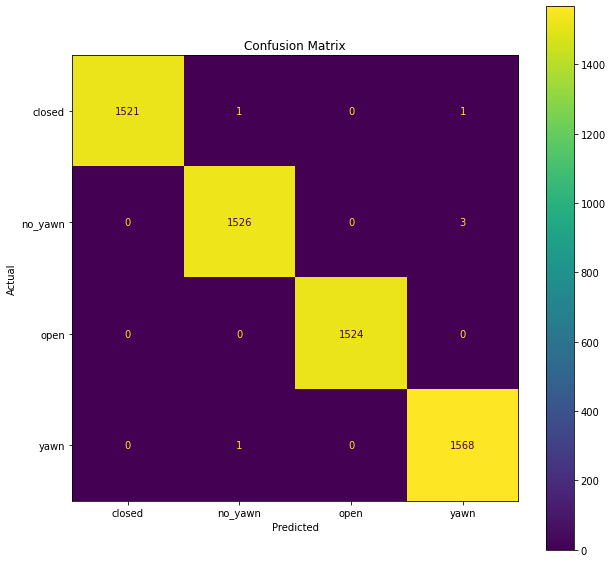

In [119]:
cmd_obj = ConfusionMatrixDisplay(confusion_matrix, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(10,10))
cmd_obj.plot(ax=ax)
cmd_obj.ax_.set(
                title='Confusion Matrix', 
                xlabel='Predicted', 
                ylabel='Actual')

plt.savefig('./confusion_matrix.png')
plt.show()